# *12 - 11 - 2018*


## Machine Learning Process

- Clean / Prepare your data ( EDA Process )
  - Missing Value Treatment
  - Outlier removal
  - Standardization
  - Dummy Variable conversion
- Split your data into train and test data (Train , Test)
- Seperate input and output variables (train_x , train_y , test_x , test_y)
- Build model using training data
- Predict output values for test data
- Evaluate your model
  - Accuracy , sensitivity , specificity
- Fine tune your model (models) for better performance
  - Hyper parameter tuning , cross validation

## Finding Overall Gini Impurity (By OverTime Column)

In [1]:
import pandas as pd
import numpy as np
import pydotplus
import os

In [2]:
from sklearn.model_selection import train_test_split # (SciKit_Learn)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image

In [3]:
hr_raw = 'https://raw.githubusercontent.com/skathirmani/datasets/master/HR%20Analytics.csv'
hr = pd.read_csv(hr_raw)

In [4]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


- Output column : Target / Dependent Variable
- Input column : Independent Variables / Predictors

In [5]:
hr['Attrition'].value_counts() # to counts 1's and 0's  /  Value in the column

0    1233
1     237
Name: Attrition, dtype: int64

In [6]:
hr.shape # Gives rows and columns

(1470, 35)

In [7]:
hr['Attrition'].value_counts() / hr.shape[0] * 100 # Attrition Rate 

# This is imbalanced Class ( Proportion of output will be different)

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

- Binary classification (output) - (0/1) / (True / False) / (Yes/No)
- Input - Numrical / Categorical / Mixed 
- Output - Categorical Column

In [8]:
hr.dtypes # To get the structure of the data , i.e to get numerical and categorical columns

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
hr.info() # same as hr.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome          

In [10]:
hr._get_numeric_data() # _ is an internal function , which we ideally should not use it (to get only numerical columns in data)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2
5,32,0,1005,2,2,1,8,4,79,3,...,3,80,0,8,2,2,7,7,3,6
6,59,0,1324,3,3,1,10,3,81,4,...,1,80,3,12,3,2,1,0,0,0
7,30,0,1358,24,1,1,11,4,67,3,...,2,80,1,1,2,3,1,0,0,0
8,38,0,216,23,3,1,12,4,44,2,...,2,80,0,10,2,3,9,7,1,8
9,36,0,1299,27,3,1,13,3,94,3,...,2,80,2,17,3,2,7,7,7,7


In [11]:
hr._get_numeric_data().columns # To get column names

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Data Pre - Processing

- Missing Value Treatment
- Outlier Removal 
- Column Type conversion
- Standardization

## Split Data into Train and Test  ( and Validation )

- Build models using Train data
- Test / Validate model using Test data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
hr.shape[0] * 0.7 # for 70 % of Observations

1029.0

In [14]:
hr.shape[0] * 0.3 # for 30% of observations

441.0

## Splitting Train and test data manually 

In [15]:
np.random.randint(1,50,10) # selects random integer value from 1 to 50 (Example)

array([12, 32, 32, 29, 49, 33, 43, 25, 11, 49])

In [16]:
np.random.seed(100) # to get the same value if we set the seeds , ( we wont set seeds in real time )

# depending on sampling the accuracy value might change

train_rows = np.random.randint(1,hr.shape[0],int(hr.shape[0]*0.7)) # selects random integer value (1029 for train data) from 1 to 1470
train_rows

array([ 793,   80,  351, ..., 1083,  388,  452])

In [17]:
train = hr.iloc[train_rows]
print(train.shape)
train.head()

(1029, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
793,28,0,Travel_Rarely,895,Research & Development,15,2,Life Sciences,1,1102,...,4,80,1,4,5,2,4,2,2,2
80,30,0,Travel_Rarely,852,Research & Development,1,1,Life Sciences,1,104,...,3,80,2,10,1,2,10,8,3,0
351,32,0,Travel_Rarely,1062,Research & Development,2,3,Medical,1,471,...,3,80,1,8,4,3,8,0,0,7
54,26,0,Travel_Rarely,1443,Sales,23,3,Marketing,1,72,...,3,80,1,5,2,2,2,2,0,0
803,34,0,Non-Travel,697,Research & Development,3,4,Life Sciences,1,1115,...,4,80,3,6,2,3,0,0,0,0


## Splitting Train and Test data through Python Codes

In [18]:
hr_dummies = pd.get_dummies(hr)
hr_dummies # New columns will be created based on levels (splitting), giving 1 or 0 for each column

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0
5,32,0,1005,2,2,1,8,4,79,3,...,0,0,0,0,0,0,1,1,1,0
6,59,0,1324,3,3,1,10,3,81,4,...,0,0,0,0,0,1,0,1,0,1
7,30,0,1358,24,1,1,11,4,67,3,...,0,0,0,0,1,0,0,1,1,0
8,38,0,216,23,3,1,12,4,44,2,...,0,0,0,0,0,0,1,1,1,0
9,36,0,1299,27,3,1,13,3,94,3,...,0,0,0,0,0,1,0,1,1,0


In [19]:
hr_dummies.shape

(1470, 56)

In [20]:
train , test = train_test_split( hr_dummies , test_size = 0.3 ,random_state = 100) 
print(train.shape)
print(test.shape)
train.head()

(1029, 56)
(441, 56)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
178,46,0,526,1,2,1,244,2,92,3,...,0,0,1,0,1,0,0,1,1,0
971,51,0,1405,11,2,1,1367,4,82,2,...,0,0,0,0,0,0,1,1,1,0
1172,29,0,469,10,3,1,1650,3,42,2,...,0,0,1,0,0,0,1,1,1,0
667,41,1,1085,2,4,1,927,2,57,1,...,0,0,0,0,1,0,0,1,0,1
399,31,0,329,1,2,1,530,4,98,2,...,0,0,0,0,0,1,0,1,1,0


## Separating input and output while building the model

In [21]:
train_y = train['Attrition'] # Output
test_y = test['Attrition'] # Output
train_x = train.drop('Attrition' , axis = 1) # Input , all columns except output column (Attrition) , axis = 1 (row-wise operation)
test_x = test.drop('Attrition', axis = 1) # Input , all columns except output column (Attrition) , axis = 0 (column-wise operation)
train_x.shape

(1029, 55)

In [22]:
print(train_y.shape)
print(test_y.shape)
print(train_x.shape)
print(train_x.shape)

(1029,)
(441,)
(1029, 55)
(1029, 55)


In [23]:
# To find the test values apart from train values

list(range(1470))
np.setdiff1d(list(range(1470)) , train_rows ) 

array([   0,    5,    9,   10,   11,   13,   17,   20,   23,   24,   25,
         26,   28,   29,   30,   31,   32,   33,   41,   42,   43,   44,
         45,   46,   48,   49,   52,   55,   57,   58,   65,   67,   68,
         70,   72,   73,   76,   79,   83,   85,   86,   89,   91,   92,
         93,   97,   98,  102,  104,  105,  106,  107,  108,  109,  111,
        112,  115,  117,  118,  119,  122,  125,  126,  134,  135,  138,
        140,  143,  144,  147,  148,  150,  153,  154,  155,  156,  157,
        158,  160,  161,  165,  166,  170,  171,  172,  174,  175,  177,
        178,  179,  186,  189,  190,  191,  192,  194,  196,  199,  201,
        202,  203,  204,  205,  206,  208,  209,  210,  211,  214,  217,
        219,  222,  223,  224,  225,  226,  229,  230,  232,  233,  238,
        239,  240,  242,  245,  248,  250,  251,  257,  258,  259,  260,
        262,  264,  265,  266,  267,  268,  269,  270,  271,  273,  276,
        278,  286,  288,  289,  290,  291,  292,  2

## Bulding Model

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model = DecisionTreeClassifier()
model.fit(train_x , train_y)  # Error cannot convert numerical to categorical

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
hr['Gender'].value_counts() # to get counts for males and females

Male      882
Female    588
Name: Gender, dtype: int64

In [27]:
test_pred = model.predict(test_x)
print(len(test_pred))
test_pred[:5]

441


array([1, 1, 0, 0, 0], dtype=int64)

## Evaluate model performance

In [28]:
df_pred = pd.DataFrame ({'Actual' : test_y ,         # comparing Actual and Predicted Value
                       'Predicted' : test_pred})
df_pred.head()

,Actual,Predicted
880,0,1
152,0,1
1466,0,0
1084,0,0
1086,0,0


In [29]:
df_pred['Pred_Status'] = df_pred['Actual'] == df_pred['Predicted'] # to create True and False
df_pred.head()

,Actual,Predicted,Pred_Status
880,0,1,False
152,0,1,False
1466,0,0,True
1084,0,0,True
1086,0,0,True


In [30]:
df_pred['Pred_Status'].value_counts() # Accuracy = 77.55 % , with respect to Original Data

True     342
False     99
Name: Pred_Status, dtype: int64

## Machine Learning Process

- Clean / Prepare your data ( EDA Process )
  - Missing Value Treatment
  - Outlier removal
  - Standardization
  - Dummy Variable conversion
- Split your data into train and test data (Train , Test)
- Seperate input and output variables (train_x , train_y , test_x , test_y)
- Build model using training data
- Predict output values for test data
- Evaluate your model
  - Accuracy , sensitivity , specificity
- Fine tune your model (models) for better performance
  - Hyper parameter tuning , cross validation

## Finding Gini Impurity

In [37]:
print(train_y.shape)
train_y.value_counts()

(1029,)


0    862
1    167
Name: Attrition, dtype: int64

In [38]:
yes = 862/1029
print(yes)
no = 167/1029
print(no)
GI_Hr = 1- (yes)**2 - (no)**2
print(GI_Hr)






0.8377065111758989
0.16229348882410108
0.27190862461880494


In [42]:
train.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender

## Finding Gini Impurity Using Gender_Female & Gender_Male Columns

In [45]:
females = train[train['Gender_Female'] == 1]
females.shape

(419, 56)

In [46]:
females['Attrition'].value_counts()

0    357
1     62
Name: Attrition, dtype: int64

In [48]:
GI_Females = 1 - (357/419)**2 - (62/419)**2
GI_Females

0.2521516737772056

In [49]:
Males = train[train['Gender_Male'] == 1]
Males.shape

(610, 56)

In [51]:
Males['Attrition'].value_counts()

0    505
1    105
Name: Attrition, dtype: int64

In [52]:
GI_Males = 1 - (505/610)**2 - (105/610)**2
GI_Males

0.2850040311744155

## Finding Overall Gini Impurity (By Gender Column)

In [55]:
# GI = ( N.l / N   * GI.l)  + ( N.r / N   * GI.r)

GI_overall = ((419/1029)*0.2521) + ((610/1029)*0.285)
GI_overall

0.27160340136054417

## Finding Gini Impurity Again using another column (OvertTime_Yes  &  OverTime_No)

In [69]:
overtime_no = train[train['OverTime_No'] == 1]
overtime_no.shape

(740, 56)

In [62]:
overtime_no['Attrition'].value_counts()

0    665
1     75
Name: Attrition, dtype: int64

In [77]:
GI_No = 1 - (665/740)**2 - (75/740)**2
print(GI_No)

GI_No_1 = 1 - (sum(overtime_no['Attrition'] == 0)/overtime_no.shape[0])**2 - (sum(overtime_no['Attrition'] == 1)/overtime_no.shape[0])**2
GI_No_1

0.18215850986121246


0.18215850986121246

In [64]:
overtime_yes = train[train['OverTime_Yes'] == 1]
overtime_yes.shape

(289, 56)

In [65]:
overtime_yes['Attrition'].value_counts()

0    197
1     92
Name: Attrition, dtype: int64

In [81]:
GI_Yes = 1 - (197/289)**2 - (92/289)**2
print(GI_Yes)

GI_Yes_1 = 1 - (sum(overtime_yes['Attrition'] == 0)/overtime_yes.shape[0])**2 - (sum(overtime_yes['Attrition'] == 1)/overtime_yes.shape[0])**2
GI_Yes_1

0.4339986350738138


0.4339986350738138

## Finding Overall Gini Impurity (By OverTime Column)

In [84]:
GI_overall = ((740/1029)*0.1821) + ((289/1029)*0.4339)
print(GI_overall)

GI_overall = ((overtime_no.shape[0]/train.shape[0])*0.1821) + ((overtime_yes.shape[0]/train.shape[0])*0.4339)
GI_overall

0.25281933916423716


0.25281933916423716

## Gini Impurity Before - Gini Impurity After = Information Gain

In [102]:
print(min(train['MonthlyIncome']))
print(max(train['MonthlyIncome']))
print(train['MonthlyIncome'].unique().shape) # To find unique Values
print(np.sort(train['MonthlyIncome']))

1009
19973
(968,)
[ 1009  1051  1081 ... 19847 19943 19973]


# *13 - 11 - 2018*

In [110]:
mi_uniqs = np.unique(train['MonthlyIncome'])
print(mi_uniqs[:5])

[1009 1051 1081 1091 1102]


In [109]:
cuts = pd.Series(mi_uniqs).rolling(2).mean()[1:] # rolling mean is used for moving average, 3 will take 3 values at a time
cuts.head()

1    1030.0
2    1066.0
3    1086.0
4    1096.5
5    1110.0
dtype: float64

In [116]:
cut = 1086
samples_left = train[train['MonthlyIncome'] <cut]
samples_right = train[train['MonthlyIncome']>cut]

nparent = train.shape[0]
nleft = samples_left.shape[0]
nright = samples_right.shape[0]
print(nparent , nleft , nright)

p0_left = samples_left[samples_left['Attrition'] == 0].shape[0] /nleft
p1_left = samples_left[samples_left['Attrition'] == 1].shape[0] /nleft
gi_left = 1 - np.square(p0_left) - np.square(p1_left)

p0_right = samples_right[samples_right['Attrition'] == 0].shape[0] /nright
p1_right = samples_right[samples_right['Attrition'] == 1].shape[0] /nright
gi_right = 1 - np.square(p0_right) - np.square(p1_right)

print(gi_left)
print(gi_right)

gi_cut = (nleft/nparent*gi_left) + (nright/nparent*gi_right)
print(gi_cut)

1029 3 1026
0.4444444444444444
0.2699121097089703
0.2704209503350212


In [117]:
cut = 1096.5
samples_left = train[train['MonthlyIncome'] <cut]
samples_right = train[train['MonthlyIncome']>cut]

nparent = train.shape[0]
nleft = samples_left.shape[0]
nright = samples_right.shape[0]
print(nparent , nleft , nright)

p0_left = samples_left[samples_left['Attrition'] == 0].shape[0] /nleft
p1_left = samples_left[samples_left['Attrition'] == 1].shape[0] /nleft
gi_left = 1 - np.square(p0_left) - np.square(p1_left)

p0_right = samples_right[samples_right['Attrition'] == 0].shape[0] /nright
p1_right = samples_right[samples_right['Attrition'] == 1].shape[0] /nright
gi_right = 1 - np.square(p0_right) - np.square(p1_right)

print(gi_left)
print(gi_right)

gi_cut = (nleft/nparent*gi_left) + (nright/nparent*gi_right)
print(gi_cut)

1029 4 1025
0.375
0.2688000000000001
0.2692128279883383


## Using for Loop for iteration of every cut

In [134]:
# cut = 1086 e.g

# cuts = pd.Series(mi_uniqs).rolling(2).mean()[1:] # rolling mean is used for moving average, 3 will take 3 values at a time
# cuts.head()

df_gi_cuts = pd.DataFrame(columns = ['cut','gi' , 'gi_left' , 'gi_right'])

for cut in cuts:
    samples_left = train[train['MonthlyIncome'] <cut]
    samples_right = train[train['MonthlyIncome']>cut]

    nparent = train.shape[0]
    nleft = samples_left.shape[0]
    nright = samples_right.shape[0]
    #print(nparent , nleft , nright)

    p0_left = samples_left[samples_left['Attrition'] == 0].shape[0] /nleft
    p1_left = samples_left[samples_left['Attrition'] == 1].shape[0] /nleft
    gi_left = 1 - np.square(p0_left) - np.square(p1_left)

    p0_right = samples_right[samples_right['Attrition'] == 0].shape[0] /nright
    p1_right = samples_right[samples_right['Attrition'] == 1].shape[0] /nright
    gi_right = 1 - np.square(p0_right) - np.square(p1_right)

    #print(gi_left)
    #print(gi_right)

    gi_cut = (nleft/nparent*gi_left) + (nright/nparent*gi_right)
    df_gi_cuts = df_gi_cuts.append({'cut' : cut, 'gi' : gi_cut ,
                                   'gi_left' : gi_left ,
                                   'gi_right' : gi_right} , ignore_index = True)
    #print(cut , gi_cut)
df_gi_cuts.head() 

,cut,gi,gi_left,gi_right
0,1030.0,0.270543,0.000000,0.270807
1,1066.0,0.271464,0.500000,0.271019
2,1086.0,0.270421,0.444444,0.269912
3,1096.5,0.269213,0.375000,0.268800
4,1110.0,0.267937,0.320000,0.267683


In [135]:
# Sorting the table by gi values

df_gi_cuts.sort_values( by = ['gi']).head(1)

,cut,gi,gi_left,gi_right
202,2779.5,0.254494,0.445394,0.198616


In [201]:
#train_y = train['Attrition']
#test_y = test['Attrition']
#train_x = train[['MonthlyIncome']] ## Double brackets is used to print it as a dataframe , when there's a space in column name use [[]]
#test_x = test[['MonthlyIncome']]

#model = DecisionTreeClassifier(random_state=100 , max_depth= 1) 
#model.fit(train_x , train_y)

train_y = train['Attrition']
test_y = test['Attrition']
train_x = train[['MonthlyIncome' , 'Age' , 'DistanceFromHome']]
test_x = test[['MonthlyIncome' , 'Age' , 'DistanceFromHome']]

model = DecisionTreeClassifier(random_state=100 , max_depth = 2) # Max_depth to control the depth of the splitting of decision tree
model.fit(train_x , train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

##  Bi partitioning Algorithm ( Because we divide it into two parts)

In [181]:
from sklearn import tree 
with open("model.dot" ,"w") as f:
    f = tree.export_graphviz(model , out_file = f,
                            feature_names = train_x.columns) # to get the columns names in deicision tree


In [133]:
import os
os.getcwd()

'C:\\Users\\Administrator'

In [159]:
!pip install pydotplus

  Running setup.py bdist_wheel for pydotplus: started
  Running setup.py bdist_wheel for pydotplus: finished with status 'done'
  Stored in directory: C:\Users\Administrator\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [166]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

import os
graphviz_path = 'C:\Program Files (x86)\Graphviz2.38/bin/'
os.environ["PATH"] += os.pathsep + graphviz_path ## same as x = x + 1

In [169]:
os.environ["PATH"] # Path
os.pathsep # Path separator

';'

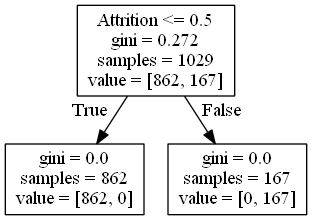

In [167]:
dot_data = StringIO()
tree.export_graphviz(model ,
                   out_file = dot_data ,
                   feature_names = train_x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Defining a function for decision tree

In [182]:
def draw_tree(model,columns) :
    
    import pydotplus
    from sklearn.externals.six import StringIO
    from IPython.display import Image

    import os
    graphviz_path = 'C:\Program Files (x86)\Graphviz2.38/bin/'
    os.environ["PATH"] += os.pathsep + graphviz_path ## same as x = x + 1
    
    dot_data = StringIO()
    tree.export_graphviz(model ,
                       out_file = dot_data ,
                       feature_names =columns)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

## Creating a model using function draw_tree

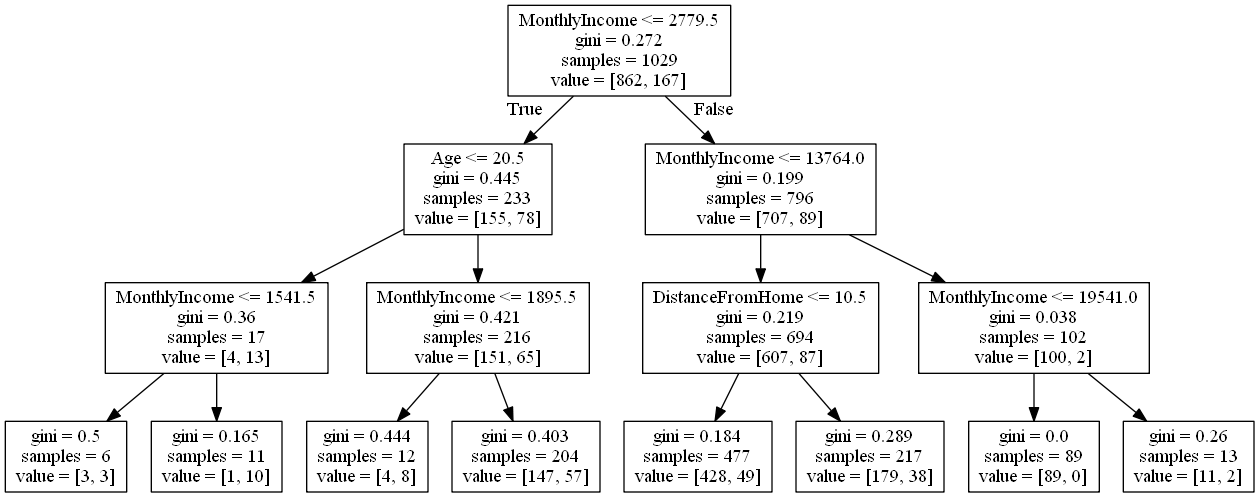

In [202]:
model = DecisionTreeClassifier(random_state=100 , max_depth = 3) # Max_depth to control the depth of the splitting of decision tree
model.fit(train_x , train_y)
draw_tree(model , train_x.columns) # Any columns can come any number of time if it is important to give less gini impurity

In [188]:
node1 = train[train['OverTime_No'] <= 0.5]
node1.shape

(289, 56)

In [190]:
test[['MonthlyIncome', 'OverTime_No']].head() # Double brackets is used for a proper dataframe(and for column names with spaces)

,MonthlyIncome,OverTime_No
880,2743,1
152,2306,0
1466,9991,1
1084,7083,0
1086,14411,0


In [193]:
pd.DataFrame(model.predict_proba(test_x)).head() # To get the probability value directly of 0's and 1's

,0,1
0,0.839695,0.160305
1,0.301887,0.698113
2,0.929432,0.070568
3,0.800000,0.200000
4,1.000000,0.000000


 ## How  RANDOM FOREST works

In [198]:
## Decision Tree (How does random forest work)

all_cols = train.drop('Attrition',axis = 1).columns
cols_used = all_cols[np.random.randint(1,len(all_cols),3)]
print(cols_used)

train_y = train['Attrition']
test_y = test['Attrition']

train_x = train[cols_used]
test_x = test[cols_used]

model = DecisionTreeClassifier(random_state=100)
model.fit(train_x , train_y)

pd.DataFrame(model.predict(test_x),index = test.index,
             columns = ['Attrition_Predicted']).head()


Index(['Gender_Female', 'PercentSalaryHike', 'Over18_Y'], dtype='object')


,Attrition_Predicted
880,0
152,0
1466,0
1084,0
1086,0


## No 0f Trees = ntree =  used for checking accuracy algorithms
## No of columns = HyperParamaters = mtry = sq.rt(D) , D = no of columns in training data
## Ensemble / Bagging
## Entropy
    - Bagging
    - boosting
    - hybrid
    - stacking


## Accuracy using Random Forest Classifier

In [200]:
train_y = train['Attrition']
test_y = test['Attrition']

train_x = train.drop('Attrition' , axis=1)
test_x = test.drop('Attrition', axis = 1)

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state = 100)
model_rf.fit(train_x , train_y)

test_pred = model_rf.predict(test_x)
df_pred = pd.DataFrame({'actual':test_y ,
                       'predicted' : test_pred})
df_pred['pred_status'] = df_pred['actual'] == df_pred['predicted']
df_pred['pred_status'].sum()/df_pred.shape[0]*100

85.71428571428571